In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# importing the churn_raw_data.csv through the file path
df = pd.read_csv('/Users/justinhuynh/Desktop/churn.csv')
# check all information about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [11]:
# select the relevant continuous variables for clustering
df_cluster = df[['MonthlyCharge', 'Bandwidth_GB_Year']]

In [12]:
# check for missing values in the selected columns
missing_values = df_cluster.isnull().sum()

In [13]:
# drop rows with missing values (if any)
df_cluster_clean = df_cluster.dropna()

In [14]:
# standardize the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_clean)

In [15]:
# convert back to dataframe for ease of use
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=['MonthlyCharge', 'Bandwidth_GB_Year'])

In [16]:
# save prepared data to csv
df_cluster_scaled.to_csv('prepared_data_d212_task1.csv', index=False)

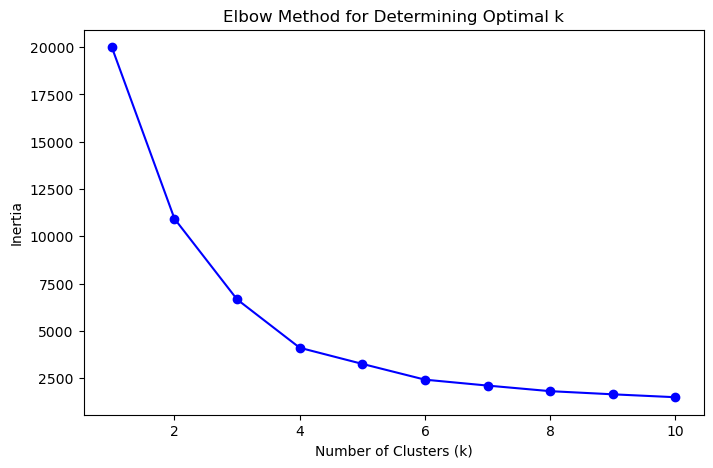

In [17]:
# determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# plotting the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

# perform K-means clustering with the optimal number of clusters
optimal_k = 3  
# replace with the optimal k determined from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster_scaled['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

In [18]:
# save the clustered data to a csv file
df_cluster_scaled.to_csv('clustered_data_d212_task1.csv', index=False)